In [1]:
from PIL import Image as im
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path=r"C:\Users\ASUS\OneDrive\Desktop\4.jpg"
img=im.open(path)
img = img.convert("RGBA")
img_ar=np.array(img)

In [3]:
def prnt(img_ar):
    plot=plt.imshow(img_ar)
    plt.show()

In [4]:
def brt(rgb1,rgb2):
    s1=0
    s2=0
    for i in range(3):
        s1+=rgb1[i]
        s2+=rgb2[i]
    s1/=3
    s2/=3
    if abs(s1-s2)>=12: return True
    return False

In [5]:
def foreground(img_ar,i,j,r,l,d,u,rd,ld,lu,ru):
    ret=[]
    if r :
        if brt(img_ar[i][j],img_ar[i][j+1]): ret.append((i,j+1))
    if l:
        if brt(img_ar[i][j],img_ar[i][j-1]): ret.append((i,j-1))
    if d:
        if brt(img_ar[i][j],img_ar[i+1][j]): ret.append((i+1,j))
    if u:
        if brt(img_ar[i][j],img_ar[i-1][j]): ret.append((i-1,j))
    if ld:
        if brt(img_ar[i][j],img_ar[i+1][j-1]): ret.append((i+1,j-1))
    if rd:
        if brt(img_ar[i][j],img_ar[i+1][j+1]): ret.append((i+1,j+1))
    if lu:
        if brt(img_ar[i][j],img_ar[i-1][j-1]): ret.append((i-1,j-1))
    if ru:
        if brt(img_ar[i][j],img_ar[i-1][j+1]): ret.append((i-1,j+1))
    return ret

In [6]:
fore=[]
for i in range(img_ar.shape[0]):
    for j in range(img_ar.shape[1]):
        r=[]
        if i==0: 
            if j==0: r=foreground(img_ar,i,j,True,False,True,False,True,False,False,False)
            elif j==img_ar.shape[1]-1:  r=foreground(img_ar,i,j,False,True,True,False,False,True,False,False)               
            else: r=foreground(img_ar,i,j,True,True,True,False,True,True,False,False)                    
        elif i==img_ar.shape[0]-1:
            if j==0: r=foreground(img_ar,i,j,True,False,False,True,False,False,False,True)
            elif j==img_ar.shape[1]-1: r=foreground(img_ar,i,j,False,True,False,True,False,False,True,False)
            else: r=foreground(img_ar,i,j,True,True,False,True,False,False,True,True) 
        else:
            if j==0: r=foreground(img_ar,i,j,False,True,True,True,False,True,True,False)
            elif j==img_ar.shape[1]-1: r=foreground(img_ar,i,j,False,True,True,True,False,True,True,False)
            else: r=foreground(img_ar,i,j,True,True,True,True,True,True,True,True)
        for k in r:
                    if k not in fore: fore.append(k)
                    

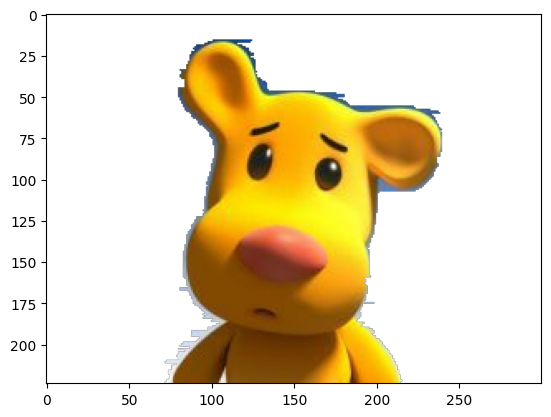

In [7]:
for i in range(img_ar.shape[0]):
    j=0
    while (j < img_ar.shape[1]):
        if((i,j) in fore):
            search = j+1
            while(search < img_ar.shape[1]):
                if(search == img_ar.shape[1]-1):
                    k = j
                    while(k<img_ar.shape[1]-1):
                        img_ar[i][k] = (0,0,0,0)
                        k+=1
                        search = k
                        j = k
                elif((i,search) in fore):
                    j = search
                    break
                search+=1
        else:
            img_ar[i][j] = (0,0,0,0)
            j+=1
plt.imshow(img_ar)
img = im.fromarray(img_ar)
img = img.save("my.png")

In [8]:
for j in range(img_ar.shape[1]):
    i=0
    while (i < img_ar.shape[0]):
        if((i,j) in fore):
            search = i+1
            while(search < img_ar.shape[0]):
                if(search == img_ar.shape[0]-1):
                    k = i
                    while(k<img_ar.shape[0]-1):
                        img_ar[k][j] = (0,0,0,0)
                        k+=1
                        search = k
                        i = k
                elif((search,j) in fore):
                    i = search
                    break
                search+=1
        else:
            img_ar[i][j] = (0,0,0,0)
            i+=1
plt.imshow(img_ar)

In [ ]:
img = im.fromarray(img_ar)
img = img.save("my.png")